In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


### Load the data

In [6]:
path_to_data = './'
QpxQpy="0"
study_name_1 = f'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_complete_500slices_QpxQpy{QpxQpy}_ayyScan'
my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
noise_type='PN'

In [7]:
my_df_1

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,"[2.3084113121854954e-08, 2.4756242426152163e-0...","[2.3252984427319944e-08, 2.432558464980576e-08...","[2.292036766369933e-08, 2.4387054598934862e-08...","[2.3105573812629753e-08, 2.5246795071772604e-0...","[2.3676653142574144e-08, 2.4243837353445315e-0...","[2.3590373492243107e-08, 2.3452835630290463e-0...","[2.5097164229779282e-08, 2.2929113807156667e-0...","[2.4989252392390035e-08, 2.223360992124884e-08...","[1.8592307891052403e-08, 2.0366952883509956e-0...","[1.2807134369978641e-08, 1.2101969173765725e-0...",...,"[1.4275649248194832e-08, 1.1436464425546785e-0...","[1.496968593747031e-08, 1.7506618521552884e-08...","[1.5358790440228227e-08, 1.4688730097248336e-0...","[2.007226326798426e-08, 1.7396016623881102e-08...","[1.7732823254373974e-08, 1.9029910770077612e-0...","[1.9886602542224618e-08, 2.040957315912023e-08...","[2.0811035581313042e-08, 2.098114832839513e-08...","[2.0449191807255388e-08, 2.003029948960041e-08...","[3.037281262500524e-08, 2.5631696621969464e-08...","[2.5053281909367676e-08, 1.9007860721246763e-0..."
b,"[1.9997303664916106e-06, 1.9978531665062798e-0...","[1.9986762559817963e-06, 1.996813837808823e-06...","[1.9993998917409548e-06, 1.99902179229817e-06,...","[1.997630524516713e-06, 1.996862145955272e-06,...","[1.9989231282943877e-06, 1.998036353117849e-06...","[2.001040634922849e-06, 2.000686872778812e-06,...","[2.000909598584237e-06, 1.9973984328530634e-06...","[1.998890046971916e-06, 1.9964988589294676e-06...","[1.9998235589138753e-06, 1.993050863743283e-06...","[1.9988532865707073e-06, 1.9982532461978593e-0...",...,"[2.0001512436730894e-06, 1.999128184240987e-06...","[2.000481124245181e-06, 1.9963849984259623e-06...","[2.0005964851312658e-06, 1.9987259515868386e-0...","[1.9988332496105355e-06, 1.9984988999589204e-0...","[2.0016139666756956e-06, 1.998967888935978e-06...","[1.996788934587222e-06, 2.000115852158894e-06,...","[2.0022869054737766e-06, 1.9978849144088637e-0...","[2.005133803005947e-06, 1.996516250569661e-06,...","[1.994557802377805e-06, 2.001122529723085e-06,...","[1.9961489256828184e-06, 2.0049996248924206e-0..."
err,"[4.0860149262175635e-11, 4.1663055007854475e-1...","[3.729935576243704e-11, 4.832635024250776e-11,...","[4.076963412667592e-11, 4.4670713215962315e-11...","[4.186256495943422e-11, 5.3124893050787074e-11...","[4.4886978103451977e-11, 4.641630303712826e-11...","[4.3071432638516275e-11, 4.8870302159904153e-1...","[5.244638842652806e-11, 4.930440210294519e-11,...","[5.6780261317158565e-11, 6.169614780856461e-11...","[6.249627591088062e-11, 9.759057918926929e-11,...","[4.520457549080511e-11, 4.503075361993388e-11,...",...,"[7.784003744397449e-11, 3.4983070930750785e-11...","[9.810980714375959e-11, 1.1340178175980916e-10...","[4.2579633749756467e-11, 5.119369807805991e-11...","[1.3030288944361886e-10, 9.415881679955603e-11...","[5.478225090380163e-11, 6.589430858241541e-11,...","[5.891842037771123e-11, 1.0682868063901121e-10...","[1.3301671601624292e-10, 9.690225880302618e-11...","[9.495327083424543e-11, 6.841091666271414e-11,...","[1.4799058711438815e-10, 8.27167143164752e-11,...","[5.3705652796383016e-11, 7.115418756947853e-11..."


In [8]:
my_df_keys = list(my_df_1.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

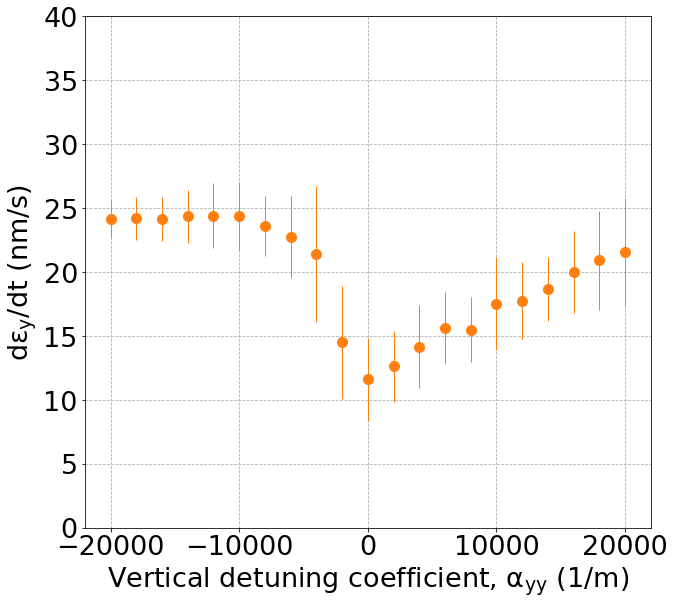

In [9]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C1', label=my_label_1)
#plt.legend(loc=4)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [10]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [11]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


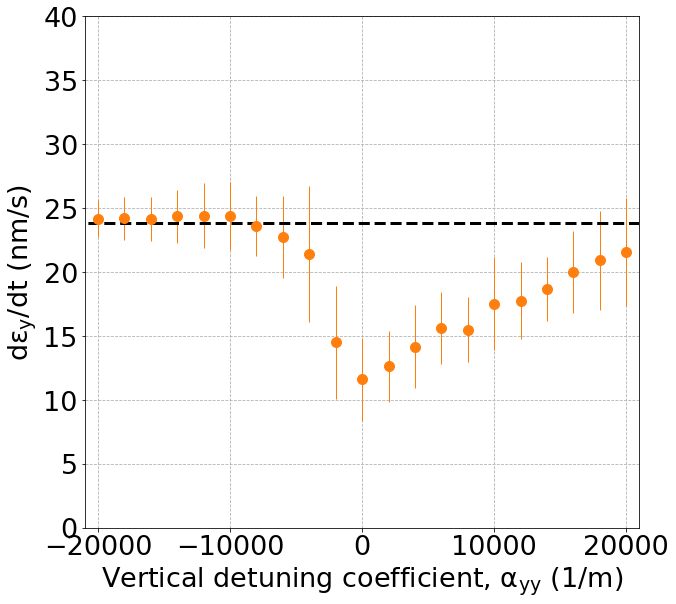

In [12]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C1', label=my_label_1)
    

plt.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

#plt.legend(loc=4)

plt.xlim(-21000, 21000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [13]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
#path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.14.1




In [14]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=6.9400568591152065e-09 m
rms(Jy)=6.936692592779671e-09 m


In [15]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

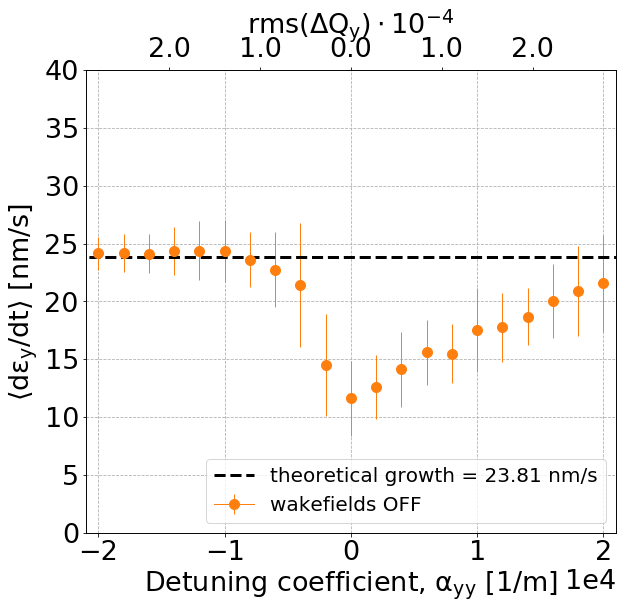

In [16]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C1', label=my_label_1) 
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=4)

ax2.set_xlim(-2*21000*rms_Jy_init*1e4, 2*21000*rms_Jy_init*1e4)
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)

#plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/{study_name_1}_vs_TuneSpread_v2.png', bbox_inches='tight')

### Plot expected rms amplitude detuning of SPS for the current settings
- b3b5b7 included 
- chroma match at the current setting (contribution from the chromatic sextupoles)
- klof=klod=1 $1/m^4$
- axy and ayy values as shown below are obtained from MAD-X

In [17]:
if QpxQpy == "0":  
    axy_sps = -1484.124066 # for Qpx=Qpy=0
    ayy_sps = 1082.073444 # for Qpx=Qpy=0
elif QpxQpy == "5e-1":  
    axy_sps = -1497.189826 # for Qpx=Qpy=0.5
    ayy_sps = 1081.203394 # for Qpx=Qpy=0.5
elif  QpxQpy == "1":  
    axy_sps = -1510.465536 # for Qpx=Qpy=1
    ayy_sps = 1080.331794 # for Qpx=Qpy=1
print(axy_sps, ayy_sps)

-1484.124066 1082.073444


In [18]:
Dqy_rms_sps = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy_sps, axy_sps)
print(Dqy_rms_sps)

2.5485688783564697e-05


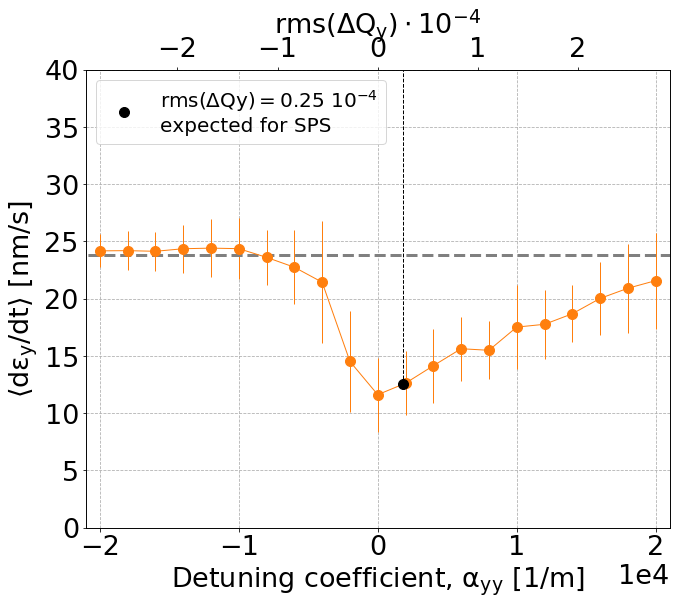

In [22]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points = []

for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C1', label=my_label_1)
   
    points.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    #points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='grey', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')


ax.plot(my_variables, points, c='C1')

# Plot SPS tune spread from MAD-X
ax2.plot(Dqy_rms_sps*1e4, 12.5, 'o', c='k', label=r'$\mathrm{rms(\Delta Qy)}=$'+f'{Dqy_rms_sps*1e4:.2f} '+r'$\mathrm{10^{-4}}$'+'\nexpected for SPS')
ax2.vlines(Dqy_rms_sps*1e4, 12.5, 40, ls='dashed')

#ax.legend(loc=3)
ax2.legend(loc=2)

ax2.set_xlim(-2*21000*rms_Jy_init*1e4, 2*21000*rms_Jy_init*1e4)
ax.set_xlim(-21000, 21000)

ax.set_ylim(0, 40)
ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name_1}_vs_TuneSpread_expectedSPS.png', bbox_inches='tight')